In [10]:
include("../sym_cliff.jl")
using PyPlot

In [5]:
N = 10
alpha = 0.1

k = Int(N * alpha)
b_mat = binary_random_symplectic_matrix(N)
p_mat = to_stablizer_state(b_mat)[1:2:end, :]

true

In [24]:
N_list = [50, 100, 200]
alpha_list = 0:0.02:1
result = zeros(length(N_list), length(alpha_list))
for i in 1:length(N_list)
    N = N_list[i]
    mid = div(N, 2)
    b_mat = binary_random_symplectic_matrix(N)
    p_mat = to_stablizer_state(b_mat)[1:2:end, :]
    for j in 1:length(alpha_list)
        alpha = alpha_list[j]
        k = Int(round(N * alpha))
        state = p_mat[1:k, :]
        ee = negativity(state, 1:mid)
        result[i, j] = ee
    end
end

In [19]:
result

2×11 Array{Float64,2}:
 0.0   4.0   8.0  12.0  20.0  24.0  28.0  34.0  40.0  44.0  48.0
 0.0  10.0  16.0  30.0  36.0  48.0  58.0  70.0  78.0  88.0  98.0

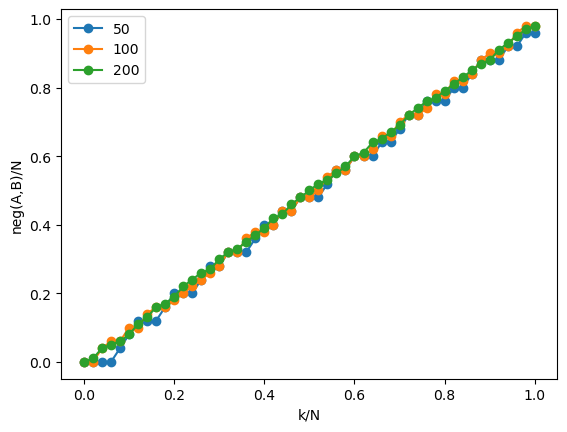

PyObject <matplotlib.legend.Legend object at 0x0000000030B73CD0>

In [25]:
fg, ax = subplots()
for i in 1:length(N_list)
    N = N_list[i]
    ax.plot(alpha_list, result[i, :] ./ N, label=N, "-o")
end
ax.set_xlabel("k/N")
ax.set_ylabel("neg(A,B)/N")
ax.legend()